In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from src.datamodule.av2_dataset import Av2Dataset
from src.datamodule.av2_extractor import Av2Extractor
from src.datamodule.av2_dataset import collate_fn
from av2.datasets.motion_forecasting import scenario_serialization
from av2.map.map_api import ArgoverseStaticMap
from src.utils.vis import  visualize_scenario
from src.model.trainer_forecast import Trainer as Model

data_root = Path("/home/jcheng/dataset/av2/val") # Path to the datase
ckpt = "./checkpoints/model_forecast_finetune.ckpt"
dataset = Av2Dataset(data_root=data_root, extractor=Av2Extractor(radius=150))
model = Model.load_from_checkpoint(ckpt, pretrain_weights=None)
model = model.eval()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extracting data from /home/jcheng/dataset/av2/val
data root: /home/jcheng/dataset/av2/val/None, total number of files: 24988


/home/jcheng/miniconda3/envs/av2_old/lib/python3.8/site-packages/torch/nn/modules/activation.py:1144: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ../aten/src/ATen/native/transformers/attention.cpp:150.)
  return torch._native_multi_head_attention(


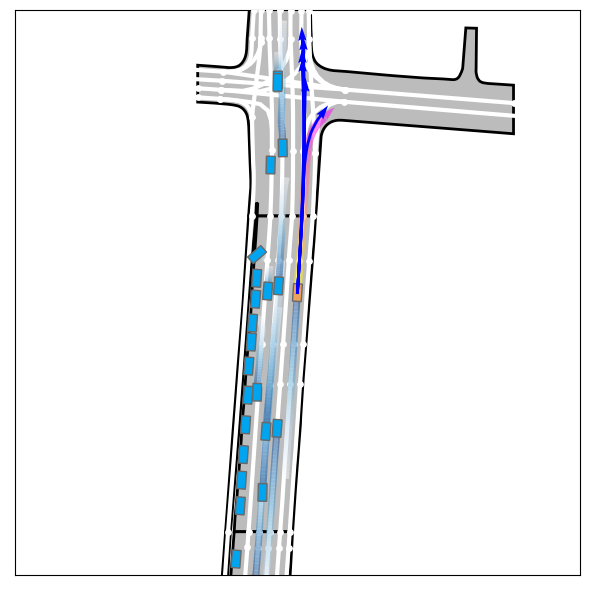

In [3]:
data = dataset[16]
scene_id = data["scenario_id"]
scene_file = data_root / scene_id / ("scenario_" + scene_id + ".parquet")
map_file = data_root / scene_id / ("log_map_archive_" + scene_id + ".json")
scenario = scenario_serialization.load_argoverse_scenario_parquet(scene_file)
static_map = ArgoverseStaticMap.from_json(map_file)

prediction, prob = model.predict(collate_fn([data]))
visualize_scenario(scenario, static_map, prediction=prediction.squeeze(0))